# Imports

In [190]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# Transformer and Data Loader

In [191]:
# convert images to tensors 
# scale data between 0 and 1 
# normalize data 

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('./DigitRecognitionData/Train/', download=True, train=True, transform=transform)
valset = datasets.MNIST('./DigitRecognitionData/Valid/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# Display Images

In [192]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


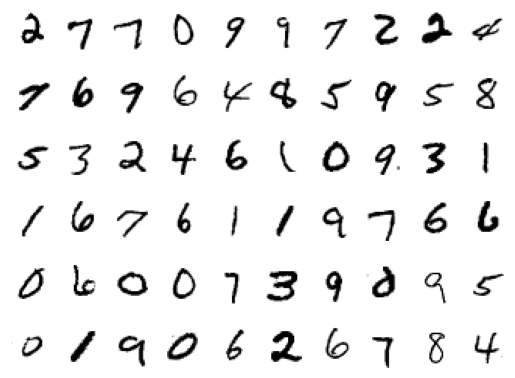

In [193]:
figure = plt.figure()

num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Build the Neural Network

In [194]:
class NeuralNetwork:
    
    def __init__(self, hidden_sizes, trainloader, valloader):
        self.input_size = 784
        self.output_size = 10
        self.model = None
        self.train_loss_list = list()
        self.valid_loss_list = list()
        self.training_time = None
        self.test_accuracy = None
    
        self.hidden_sizes = hidden_sizes
        self.trainloader = trainloader
        self.valloader = valloader
        self.__define_model__()

    
    def __define_model__(self):
        self.model = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(self.hidden_sizes[0], self.hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(self.hidden_sizes[1], self.output_size),
            nn.LogSoftmax(dim=1)
        )

    
    def get_model_details(self):
        print(self.model)

    
    def train_model(self):
        time0 = time()
        epochs = 15
        optimizer = optim.SGD(self.model.parameters(), lr=0.003, momentum=0.9)
        criterion = nn.NLLLoss()

        # training
        print("Training Started \n")
        for e in range(1, epochs+1):
            running_loss = 0

            # training
            self.model.train()
            
            for images, labels in self.trainloader:
                images = images.view(images.shape[0], -1)      # flatten
            
                # Training pass
                optimizer.zero_grad()
                output = self.model(images)
                loss = criterion(output, labels)
                loss.backward()                                # backpropagation
                #And optimizes its weights here
                optimizer.step()
                
                running_loss += loss.item()
                
            self.train_loss_list.append((running_loss/len(self.trainloader)))

            running_loss = 0
            # evaluation
            self.model.eval()

            with torch.no_grad():
                for images, labels in self.valloader:
                    images = images.view(images.shape[0], -1)
                    output = self.model(images)
                    val_loss = criterion(output, labels)
                    running_loss += loss.item()

                self.valid_loss_list.append((running_loss/len(self.valloader)))

            message = 'Epoch {} done with training loss {} '.format(e, self.train_loss_list[-1]) + \
                  'validation loss {}'.format(self.valid_loss_list[-1])
            print(message)
            
        self.training_time = (time()-time0/60) 


    def test_model(self):
        correct_count, all_count = 0, 0
        
        for images, labels in self.valloader:
            for i in range(len(labels)):
                img = images[i].view(1, 784)          # flatten
                
                with torch.no_grad():
                    logps = self.model(img)

                ps = torch.exp(logps)
                probab = list(ps.numpy()[0])
                pred_label = probab.index(max(probab))
                true_label = labels.numpy()[i]
                
                if(true_label == pred_label):
                    correct_count += 1
                    
                all_count += 1

        self.test_accuracy = (correct_count/all_count)


    def visualization(self, figurename):
        plt.figure()
        plt.plot(self.train_loss_list)
        plt.plot(self.valid_loss_list)
        plt.title(f'Model Loss Graph for number of hidden neurons {self.hidden_sizes}')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train','Validation'], loc = 'upper left')
        plt.savefig(f'./Images/Problem_1/{figurename}.pdf')
        plt.show()

# With Given Number of Hidden Units

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Training Started 

Epoch 1 done with training loss 0.6302553611015206 validation loss 0.22433389723300934
Epoch 2 done with training loss 0.2828437097704233 validation loss 0.13040289282798767
Epoch 3 done with training loss 0.21775207661394116 validation loss 0.18262985348701477
Epoch 4 done with training loss 0.17286335387980062 validation loss 0.08219099789857864
Epoch 5 done with training loss 0.14453071670761622 validation loss 0.18180719017982483
Epoch 6 done with training loss 0.12425069728576298 validation loss 0.08940351009368896
Epoch 7 done with training loss 0.11009833337798683 validation loss 0.04264990985393524
Epoch 8 done with training loss 0.09940273683818021 validation loss 0.08144800364971161
Epoch 9 done with training loss 0.0

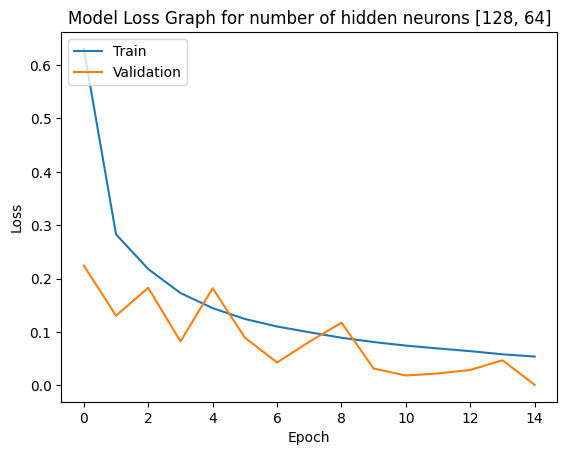

In [195]:
hidden_sizes = [128, 64]

firstNN = NeuralNetwork(hidden_sizes, trainloader, valloader)
firstNN.get_model_details()
firstNN.train_model()
firstNN.test_model()

train_loss = firstNN.train_loss_list
valid_loss = firstNN.valid_loss_list
print(firstNN.test_accuracy)

firstNN.visualization("Loss_graph_actual")

# Increase Hidden Units

### Double neurons in each layer

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Training Started 

Epoch 1 done with training loss 0.6210464582419091 validation loss 0.2852431833744049
Epoch 2 done with training loss 0.27641106759116596 validation loss 0.32304713129997253
Epoch 3 done with training loss 0.21085124328406826 validation loss 0.19893991947174072
Epoch 4 done with training loss 0.16753654626966602 validation loss 0.08883830159902573
Epoch 5 done with training loss 0.13974447629408543 validation loss 0.19570541381835938
Epoch 6 done with training loss 0.11732239817886718 validation loss 0.0173527579754591
Epoch 7 done with training loss 0.1027346750590275 validation loss 0.02675618976354599
Epoch 8 done with training loss 0.08969441083158607 validation loss 0.1613072007894516
Epoch 9 done with training loss 0.07

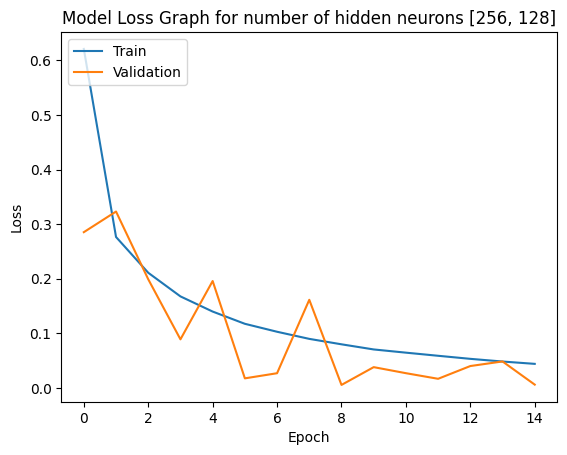

In [196]:
hidden_sizes = [256, 128]

firstNN = NeuralNetwork(hidden_sizes, trainloader, valloader)
firstNN.get_model_details()
firstNN.train_model()
firstNN.test_model()

train_loss = firstNN.train_loss_list
valid_loss = firstNN.valid_loss_list
print(firstNN.test_accuracy)

firstNN.visualization("Loss_graph_256_128")

### Double number of neurons again

In [ ]:
hidden_sizes = [512, 256]

firstNN = NeuralNetwork(hidden_sizes, trainloader, valloader)
firstNN.get_model_details()
firstNN.train_model()
firstNN.test_model()

train_loss = firstNN.train_loss_list
valid_loss = firstNN.valid_loss_list
print(firstNN.test_accuracy)

firstNN.visualization("Loss_graph_512_256")

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Training Started 

Epoch 1 done with training loss 0.5769651070840831 validation loss 0.5650503635406494
Epoch 2 done with training loss 0.26374897146339354 validation loss 0.2840588092803955
Epoch 3 done with training loss 0.1999880735998723 validation loss 0.046144820749759674
Epoch 4 done with training loss 0.15783757027357753 validation loss 0.125189408659935
Epoch 5 done with training loss 0.12889881710956758 validation loss 0.08702030777931213
Epoch 6 done with training loss 0.10819638486621953 validation loss 0.02751966565847397
Epoch 7 done with training loss 0.09280813786127706 validation loss 0.09242520481348038
Epoch 8 done with training loss 0.08012230299375475 validation loss 0.03449900820851326
Epoch 9 done with training loss 0.07

No visible improvement or diminishment 